In [1]:
from os import walk
from os.path import join 
import pandas as pd
import nltk
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

from wordcloud import WordCloud
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

In [2]:
EXAMPLE_FILE = 'SpamData/01_Processing/practice_email.txt'
SPAM_1_PATH = 'SpamData/01_Processing/spam_assassin_corpus/spam_1'
SPAM_2_PATH = 'SpamData/01_Processing/spam_assassin_corpus/spam_2'
EASY_NONSPAM_1_PATH = 'SpamData/01_Processing/spam_assassin_corpus/easy_ham_1'
EASY_NONSPAM_2_PATH = 'SpamData/01_Processing/spam_assassin_corpus/easy_ham_2'
DATA_JSON = 'SpamData/01_Processing/email-text-data.json'
WHALE_ICON ='SpamData/01_Processing/wordcloud_resources/whale-icon.png'
SKULL_ICON ='SpamData/01_Processing/wordcloud_resources/skull-icon.png'
THUMBS_UP_ICON ='SpamData/01_Processing/wordcloud_resources/thumbs-up.png'
THUMBS_DOWN_ICON ='SpamData/01_Processing/wordcloud_resources/thumbs-down.png'
FONTSANS ='SpamData/01_Processing/wordcloud_resources/OpenSansCondensed-Bold.ttf'
VOCAB_SIZE = 2500
WORD_ID = 'SpamData/01_Processing/word-by-id.csv'

TRAINING_DATA = 'SpamData/02_Training/training-data.txt'

TEST_DATA = 'SpamData/02_Training/testing-data.txt'


TOKEN_SPAM_PROB_FILE = 'SpamData/03_Testing/prob-spam.txt'
TOKEN_HAM_PROB_FILE = 'SpamData/03_Testing/prob-nonspam.txt'
TOKEN_ALL_PROB_FILE = 'SpamData/03_Testing/prob-all-tokens.txt'

TEST_FEATURE_MATRIX = 'SpamData/03_Testing/test-features.txt'
TEST_TARGET_FILE = 'SpamData/03_Testing/test-target.txt'

In [3]:
x_test = np.loadtxt(TEST_FEATURE_MATRIX,delimiter=' ')
y_test = np.loadtxt(TEST_TARGET_FILE,delimiter  = ' ')

In [4]:
prob_tokens_spam = np.loadtxt(TOKEN_SPAM_PROB_FILE,delimiter  = ' ')
prob_tokens_nonspam = np.loadtxt(TOKEN_HAM_PROB_FILE,delimiter  = ' ')
prob_tokens_all = np.loadtxt(TOKEN_ALL_PROB_FILE,delimiter  = ' ')

In [5]:
prob_tokens_all[:20]

array([0.01784799, 0.00820761, 0.00759489, 0.00689131, 0.00659078,
       0.00629491, 0.00625064, 0.00488309, 0.00469439, 0.00454063,
       0.00452665, 0.004296  , 0.00436124, 0.00441948, 0.00405604,
       0.00414923, 0.00427271, 0.00385103, 0.00353885, 0.00316842])

In [6]:
PROB_SPAM = 0.316

In [8]:
prob_log_spam = np.log(prob_tokens_spam)
prob_log_nonspam = np.log(prob_tokens_nonspam)
x_test[:10]

array([[0., 0., 1., ..., 0., 0., 0.],
       [6., 1., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [6., 1., 1., ..., 0., 0., 0.],
       [0., 0., 3., ..., 0., 0., 0.],
       [1., 0., 3., ..., 0., 0., 0.]])

In [9]:
joint_log_spam = x_test.dot(prob_log_spam - np.log(prob_tokens_all)) + np.log(PROB_SPAM)

In [11]:

joint_log_spam[:10]

array([  24.30761168,    2.17929498,   20.61090365,   17.78426674,
         20.53802506,  -12.76123489,   27.23966527,    2.17929498,
         13.60537857, -119.69734501])

In [12]:
joint_log_nonspam = x_test.dot(prob_log_nonspam - np.log(prob_tokens_all)) + np.log(1 - PROB_SPAM)

In [13]:
joint_log_nonspam[:10]

array([-60.98668371, -11.01940213, -37.97838884, -59.15251465,
       -53.80668088,  -6.89731919, -53.1984252 , -11.01940213,
       -37.80532362,  -2.37264151])

In [14]:
# Making Predictions

predictions = []
for i in range(len(joint_log_spam)):
    if joint_log_spam[i]>joint_log_nonspam[i]:
        predictions.append(1)
    else:
        predictions.append(0)

        
        
        
        
predictions[-5:]

[1, 0, 0, 0, 0]

In [15]:
y_test[-5:]

array([0., 0., 0., 0., 0.])

In [16]:
joint_log_nonspam = x_test.dot(prob_log_nonspam ) + np.log(1 - PROB_SPAM)
joint_log_spam = x_test.dot(prob_log_spam ) + np.log(PROB_SPAM)

In [17]:
r = abs(y_test - predictions).sum()
s = y_test.size

In [18]:
(s-r)/s

0.9773781902552204

In [70]:
r

39.0

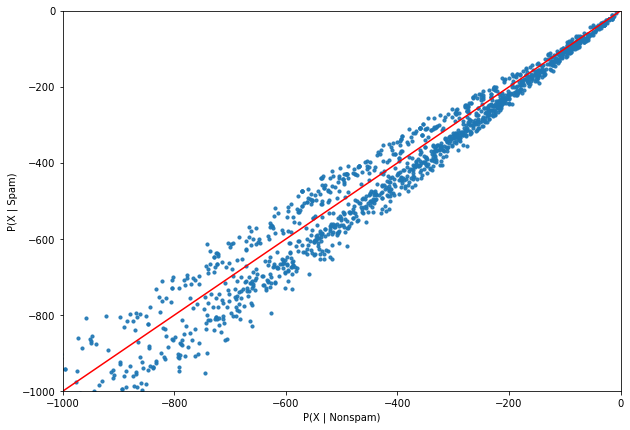

In [35]:
yaxis_label = 'P(X | Spam)'
xaxis_label = 'P(X | Nonspam)'
plt.figure(figsize=[10,7])
plt.xlabel(xaxis_label)
plt.ylabel(yaxis_label)
plt.xlim(left = -1000,right = 0)
plt.ylim(bottom = -1000,top = 0)
linedata = np.linspace(start = -10000,stop = 0,num=1000)
plt.plot(linedata,linedata,color = 'red')
plt.scatter(joint_log_nonspam,joint_log_spam,alpha = 0.9,s = 10)

In [38]:
np.unique(predictions,return_counts=True)

(array([0, 1]), array([1136,  588], dtype=int64))

In [55]:
true_pos = (((y_test) == 1.) & (predictions == 1))

In [58]:
y_test.dot(predictions)

569.0

In [60]:
true_pos = 569

In [62]:
false_pos = (1-y_test).dot(predictions)
false_pos

19.0

In [69]:
false_neg = (np.array(1) - predictions).dot( y_test)
false_neg

20.0

In [73]:
recall = true_pos/(true_pos + false_neg)

In [74]:
precision = true_pos/(true_pos + false_pos)

In [77]:
F_score = 2*recall*precision/(recall + precision)

In [78]:
F_score

0.9668649107901445